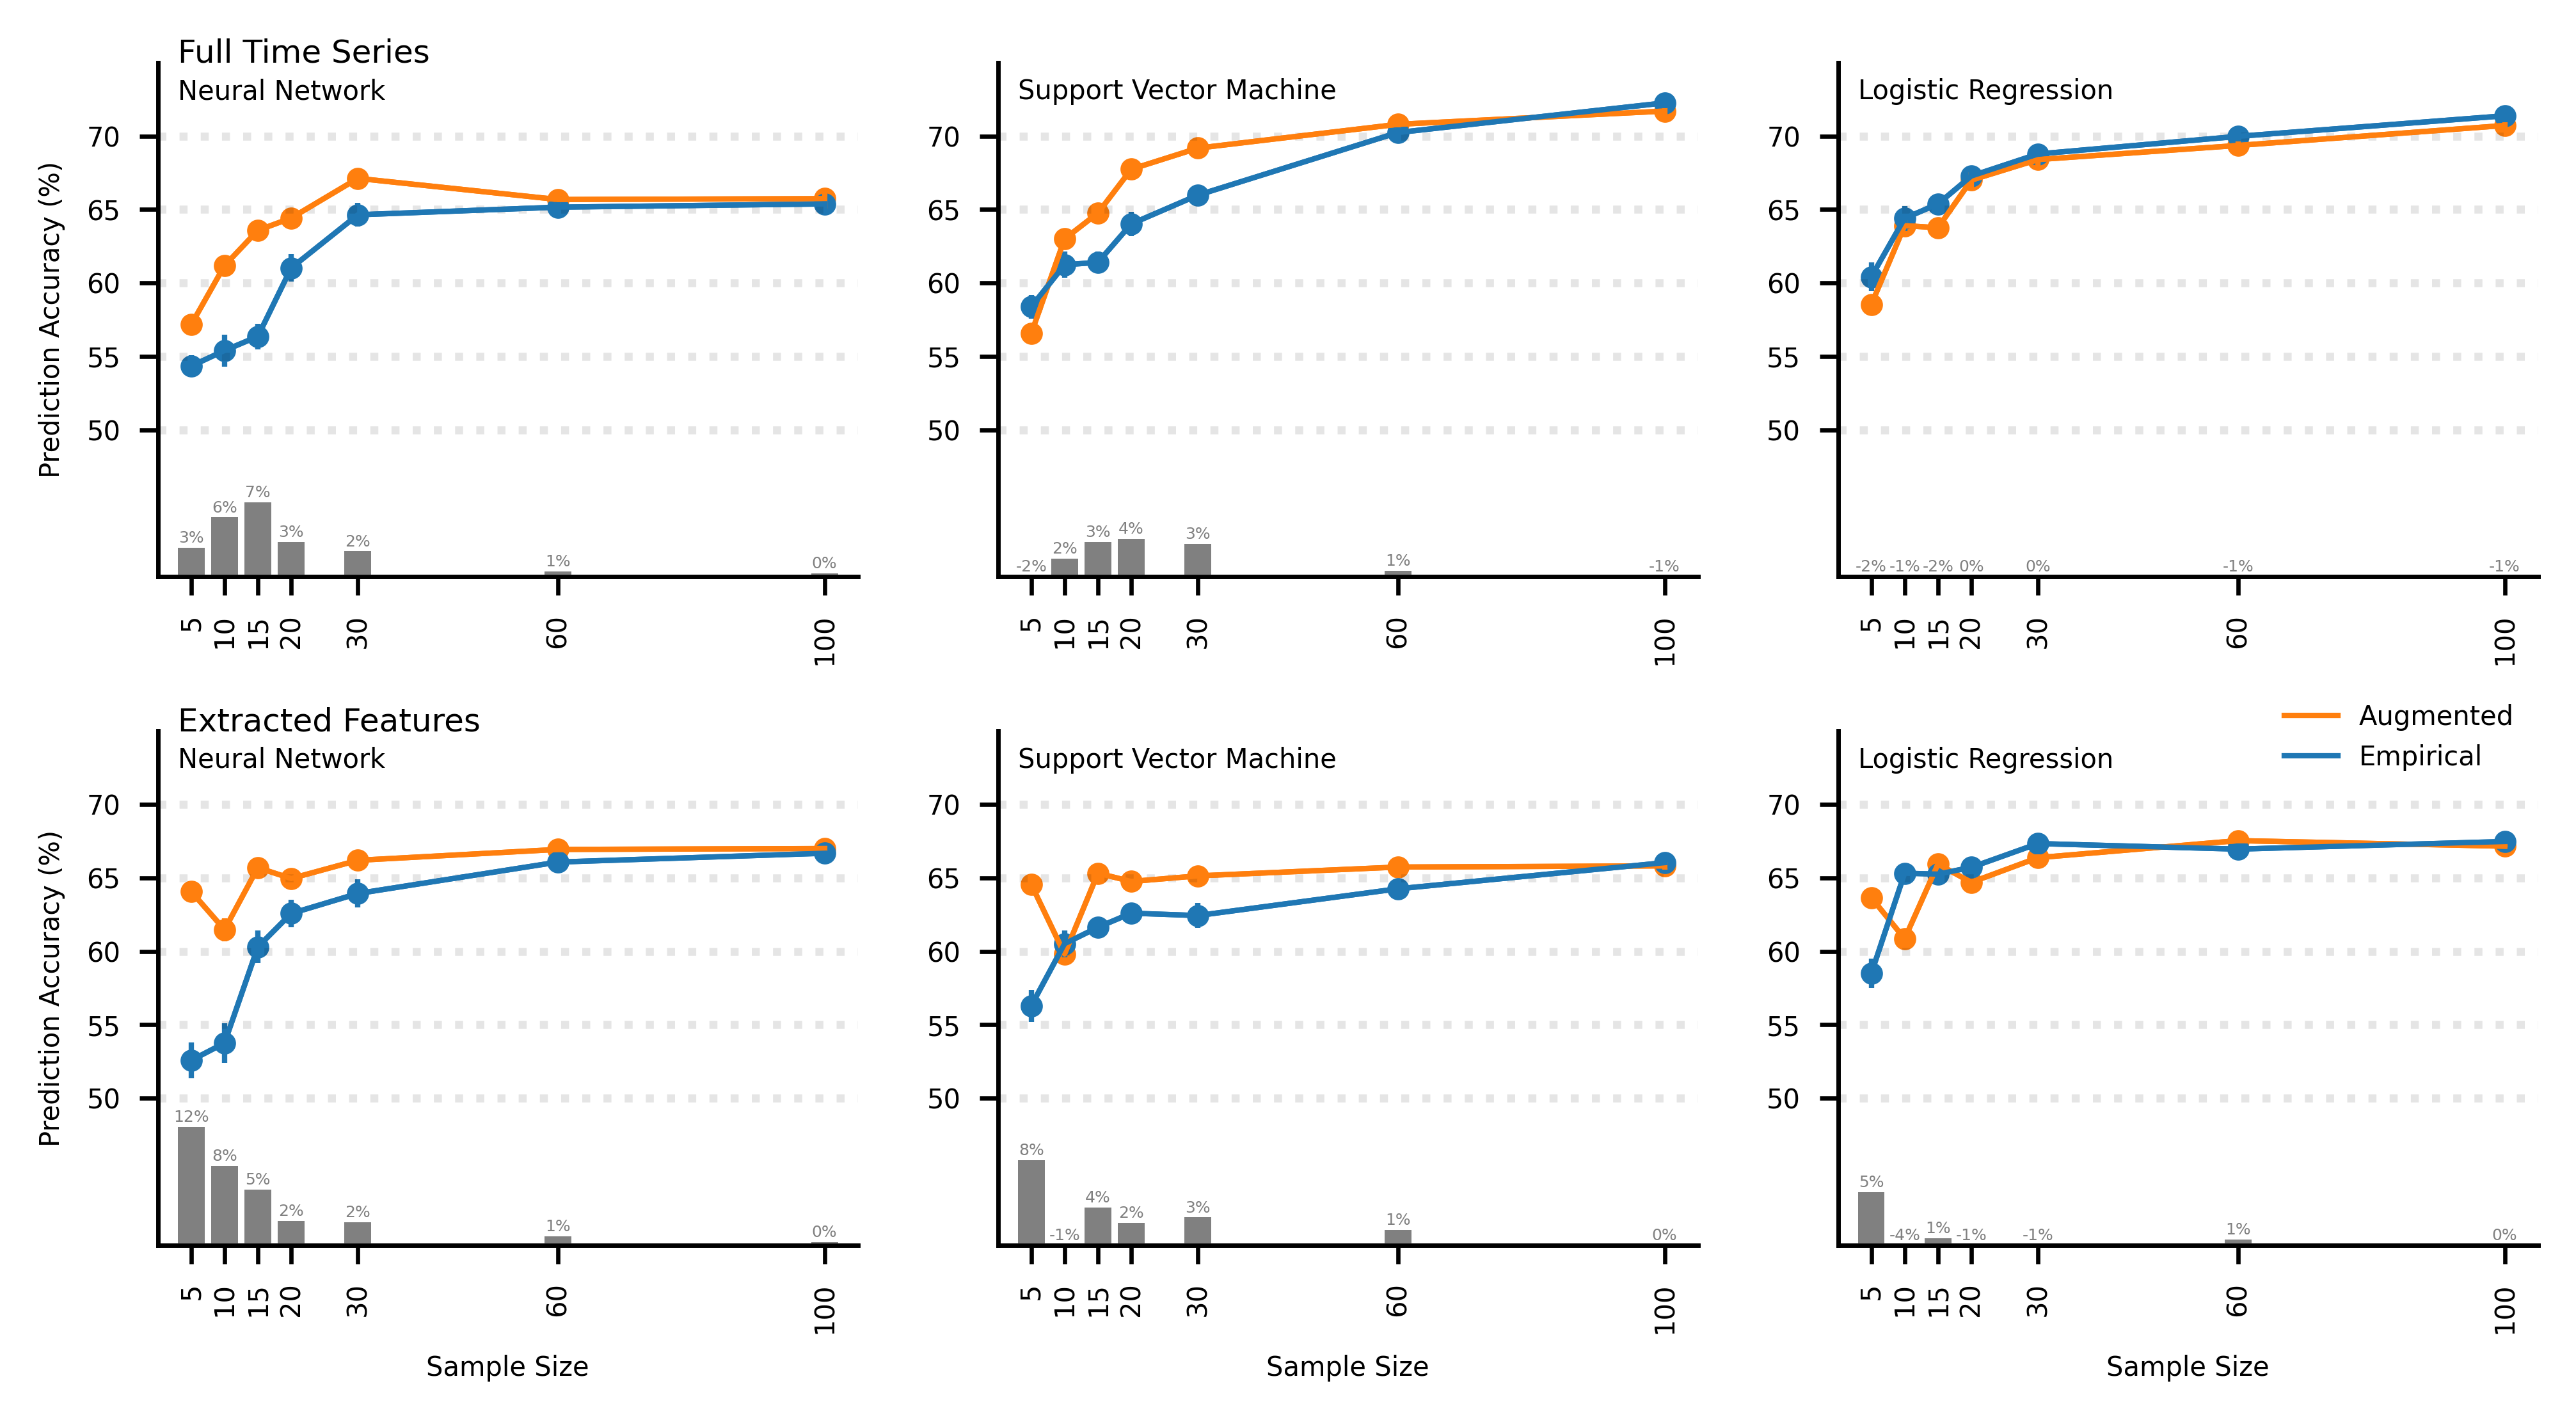

In [4]:
#Import modules
import matplotlib.pyplot as plt
import numpy as np
    
#Determine the sample sizes of interest
xLabels = [5,10,15,20,30,60,100]
data = np.arange(1,7)

#Define function to determine filenames
def retrieveData(data):   
    ##Full Time-Series
    if data == 1:
        augData = '../Modelling/Classification Results/augmentedPredictions_NN_SynP050_Runs8000_Filtered_TestClassification.csv'
        empData = '../Modelling/Classification Results/empiricalPredictions_NN_Runs8000_TestClassification.csv'
    if data == 2:
        augData = '../Modelling/Classification Results/augmentedPredictions_SVM_SynP050_Runs8000_Filtered_TestClassification.csv'
        empData = '../Modelling/Classification Results/empiricalPredictions_SVM_Runs8000_TestClassification.csv'
    if data == 3:
        augData = '../Modelling/Classification Results/augmentedPredictions_LR_SynP050_Runs8000_Filtered_TestClassification.csv'
        empData = '../Modelling/Classification Results/empiricalPredictions_LR_Runs8000_TestClassification.csv'

    ##Features
    if data == 4:
        augData = '../Modelling/Classification Results/augmentedPredictions_NN_SynP050_Runs8000_Filtered_Features_TestClassification.csv'
        empData = '../Modelling/Classification Results/empiricalPredictions_NN_Runs8000_Features_TestClassification.csv'
    if data == 5:
        augData = '../Modelling/Classification Results/augmentedPredictions_SVM_SynP050_Runs8000_Filtered_Features_TestClassification.csv'
        empData = '../Modelling/Classification Results/empiricalPredictions_SVM_Runs8000_Features_TestClassification.csv'
    if data == 6:  
        augData = '../Modelling/Classification Results/augmentedPredictions_LR_SynP050_Runs8000_Filtered_Features_TestClassification.csv'
        empData = '../Modelling/Classification Results/empiricalPredictions_LR_Runs8000_Features_TestClassification.csv'
        
    return empData, augData


#Define function to load and plot data
def loadAndPlot(filename, plotColor, legendName):
    
    #Load data
    data = []
    with open(filename) as f:
        [data.append(line.split(',')[0:4]) for line in f.readlines()]
    data = np.asarray(data).astype(int)
    
    #Process descriptive statistics of means and standard errors of the mean
    meanData = []
    semData = []
    for ss in np.unique(data[:,0]):
        ssIndex = data[:,0] == ss #Sample size
        meanData.append(np.mean(data[ssIndex,3])) #Mean
        semData.append((np.std(data[ssIndex,3]))/np.sqrt(len(data[ssIndex,3]))) #Standard error of the mean
        
    #Plot Data
    plt.plot(np.unique(data[:,0]),meanData, color = plotColor, linewidth = 1)
    plt.scatter(np.unique(data[:,0]),meanData,label='_nolegend_', color = plotColor, s = 10)
    plt.errorbar(np.unique(data[:,0]),meanData,semData,label='_nolegend_', color = plotColor, linewidth = 1)
        
    return legendName

#Define function to plot difference bars
def plotDiffData():
    
    #Load empirical data
    nnDataDS = []
    with open(empData) as f:
        [nnDataDS.append(line.split(',')[0:4]) for line in f.readlines()]
    nnDataDS = np.asarray(nnDataDS).astype(int)

    #Load synthetic data
    nnDataDSSyn_SynP100 = []
    with open(augData) as f:
        [nnDataDSSyn_SynP100.append(line.split(',')[0:4]) for line in f.readlines()]
    nnDataDSSyn_SynP100 = np.asarray(nnDataDSSyn_SynP100).astype(int)

    #Determine means of empirical data
    meanDataDS = []
    for ss in np.unique(nnDataDS[:,0]):
        ssIndex = nnDataDS[:,0] == ss
        meanDataDS.append(np.mean(nnDataDS[ssIndex,3]))

    #Determine means of synthetic data
    meanDataDSSyn_SynP100 = []
    for ss in np.unique(nnDataDSSyn_SynP100[:,0]):
        ssIndex = nnDataDSSyn_SynP100[:,0] == ss
        meanDataDSSyn_SynP100.append(np.mean(nnDataDSSyn_SynP100[ssIndex,3]))

    #Determine mean differences
    meanDiff = []
    for ss in range(len(meanDataDSSyn_SynP100)):
        meanDiff.append(meanDataDSSyn_SynP100[ss]-meanDataDS[ss])
      
    #Plot mean differences as bars with annotated labels  
    ax2.bar(xLabels,meanDiff,color='grey',width=4)
    for i in range(len(meanDataDSSyn_SynP100)):
        if meanDiff[i] > 0:
            ax2.annotate(str(round(meanDiff[i]))+'%', (xLabels[i],meanDiff[i]+.5), ha='center', color='grey', size = 3)
        else:
            ax2.annotate(str(round(meanDiff[i]))+'%', (xLabels[i],.5), ha='center', color='grey', size = 3)   
    
##########################################################
## Setup Figure
##########################################################

fig = plt.figure(figsize=(24, 4), dpi=600)
fig.subplots_adjust(hspace=.3)

##########################################################
## Plot Neural Network
##########################################################

#Iterate through all subplots
for dat in data:
    
    #Signify subplot
    ax1 = plt.subplot(2,3,dat)
        
    #Load and plot data while extracting legend names
    legendNames = []
    empData, augData = retrieveData(dat)
    legendNames.append(loadAndPlot(augData,'#ff7f0e','Augmented'))
    legendNames.append(loadAndPlot(empData,'#1f77b4','Empirical'))

    #Create horizontal lines
    axisLevels = np.arange(50,75,5)
    for y in axisLevels:
        plt.axhline(y=y, color='k', linestyle=':', alpha=.1)
        
    #Formal plot
    plt.ylim(40,75)
    plt.xlim(0,105)
    plt.xticks(xLabels)
    plt.yticks(np.arange(50,75,5))
    plt.rcParams.update({'font.size': 5})  
    plt.xticks(rotation=90)
    ax1.spines[['right', 'top']].set_visible(False)
        
    #Plot legend on last subplot
    if dat == data[-1]:
        plt.legend(legendNames, bbox_to_anchor=(1,1.1), frameon=False)
        
    #Plot y label on left subplots
    if (dat == 1) | (dat == 4):
        plt.ylabel('Prediction Accuracy (%)')
        
    #Plot x label on bottom subplots
    if dat > 3:    
        plt.xlabel('Sample Size')
    
    #Add data type titles
    if dat == 1:
        ax1.annotate('Full Time Series',(3,75), fontsize = 6)
    elif dat == 4:
        ax1.annotate('Extracted Features',(3,75), fontsize = 6)
        
    #Add classifier titles
    if (dat == 1) | (dat == 4):
        ax1.annotate('Neural Network', (3,72.5), fontsize = 5)
    elif (dat == 2) | (dat == 5):
        ax1.annotate('Support Vector Machine', (3,72.5), fontsize = 5)
    else:
        ax1.annotate('Logistic Regression', (3,72.5), fontsize = 5)

    #Add difference bars
    ax2 = ax1.twinx()  
    plotDiffData()
    
    #Format difference bars
    ax2.set_ylim(0,50)
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.set_yticks([])
    
##########################################################
## Save Plot
##########################################################
fig = plt.gcf()
fig.set_size_inches(8, 4)
fig.savefig('Figure 5.png', dpi=600, facecolor='white', edgecolor='none')
